<a href="https://colab.research.google.com/github/danbalby/dio_bootcamp_ml_metricas_avaliacao/blob/main/calcular_metricas_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [4]:
tf.__version__

'2.18.0'

In [5]:
%load_ext tensorboard

O código a seguir prepara o conjunto de dados MNIST para ser usado em tarefas de classificação, como o treinamento de uma rede neural convolucional.<br/>
1 - Carrega o conjunto de dados MNIST.<br/>
2 - Redimensiona as imagens para incluir um canal adicional, necessário para modelos baseados em redes neurais convolucionais.<br/>
3 - Normaliza os valores de pixel para o intervalo [0, 1], melhorando a eficiência do treinamento.<br/>
4 - Define as classes possíveis, que são os dígitos de 0 a 9.

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


O código a seguir define uma rede neural convolucional (CNN) para classificação de imagens utilizando o framework Keras. <br/>

Primeiramente, cria-se um modelo sequencial, no qual as camadas são empilhadas em ordem. A rede inicia com uma camada convolucional com 32 filtros de tamanho 3×3 e ativação ReLU, que processa imagens de entrada com formato 28×28×1 (imagens em tons de cinza).<br/>

Em seguida, aplica-se uma operação de max-pooling 2×2 para reduzir a dimensionalidade.<br/>

Depois, adicionam-se mais duas camadas convolucionais, com 64 filtros cada e ativação ReLU, intercaladas com outra operação de max-pooling. Após as camadas convolucionais, a saída tridimensional é achatada para um vetor 1D usando a camada Flatten, preparando os dados para as camadas densas.<br/>

Em seguida, uma camada totalmente conectada (dense) com 64 neurônios e ativação ReLU é usada para processar as características extraídas.<br/>

Por fim, a camada de saída tem 10 neurônios (uma para cada classe) e utiliza a função softmax, que converte os resultados em probabilidades, sendo ideal para classificação multiclasse, como no caso de identificar dígitos manuscritos (0 a 9).

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A linha de código a seguir cria um callback do TensorBoard para monitorar e visualizar métricas de treinamento e validação em tempo real. Especificamente:

* tf.keras.callbacks.TensorBoard: É um callback que permite registrar eventos e dados durante o treinamento de um modelo, como perdas, métricas, histogramas de pesos e distribuições.
* logdir: É o diretório onde os dados do treinamento serão armazenados. Esses dados são posteriormente usados pelo TensorBoard para gerar visualizações.
* histogram_freq=1: Indica que os histogramas de pesos e viéses das camadas serão registrados a cada 1 época. Esses histogramas permitem visualizar como os pesos das camadas evoluem durante o treinamento.

Em resumo, essa linha configura o TensorBoard para acompanhar o treinamento do modelo, salvando os dados no diretório especificado e registrando informações detalhadas a cada época.

In [8]:
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

O código a seguir configura o modelo para usar o otimizador Adam, a função de perda sparse_categorical_crossentropy e a métrica de precisão, e, em seguida, treina o modelo com os dados de treinamento por 5 épocas, enquanto monitora o desempenho nos dados de validação.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.8933 - loss: 0.3408 - val_accuracy: 0.9854 - val_loss: 0.0460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.9836 - loss: 0.0526 - val_accuracy: 0.9898 - val_loss: 0.0299
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9874 - val_loss: 0.0383
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9914 - loss: 0.0257 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9938 - loss: 0.0182 - val_accuracy: 0.9895 - val_loss: 0.0359


O código a seguir avalia o desempenho do modelo criando uma matriz de confusão normalizada para as previsões das imagens de teste. Essa matriz é visualizada como um gráfico de calor (heatmap), que ajuda a identificar o desempenho do modelo em cada classe e possíveis erros de classificação.









313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


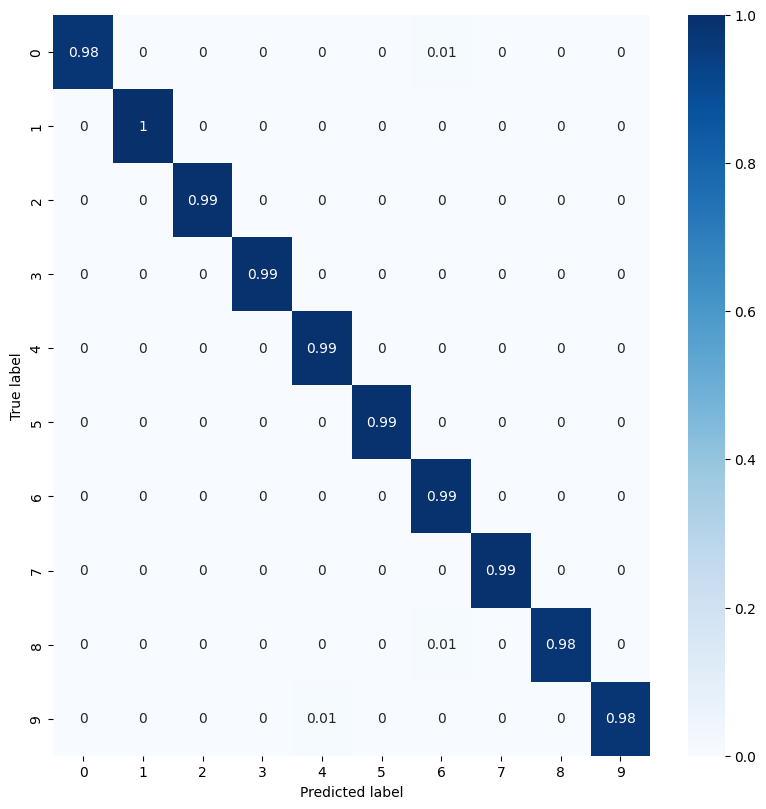

In [14]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)
classes=[0,1,2,3,4,5,6,7,8,9]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
# Calcular elementos da matriz de confusão
FP = con_mat.sum(axis=0) - np.diag(con_mat)
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)

# Calcular métricas
sensibilidade = VP / (VP + FN)
especificidade = VN / (VN + FP)
acuracia = (VP + VN) / con_mat.sum()
precisao = VP / (VP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Exibir resultados
print("Sensibilidade:", sensibilidade)
print("Especificidade:", especificidade)
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("F-Score:", f_score)


Sensibilidade: [0.98265306 0.99911894 0.98546512 0.99207921 0.99490835 0.99103139
 0.99478079 0.99027237 0.9825462  0.98116947]
Especificidade: [0.99922395 0.99864636 0.99944246 0.9996663  0.99866933 0.99890206
 0.99646096 0.99877396 0.99955684 0.998999  ]
Acurácia: [0.9976 0.9987 0.998  0.9989 0.9983 0.9982 0.9963 0.9979 0.9979 0.9972]
Precisão: [0.99278351 0.9895288  0.99510763 0.99701493 0.98786653 0.98881432
 0.96751269 0.98931001 0.99583767 0.99099099]
F-Score: [0.98769231 0.99430075 0.9902629  0.99454094 0.99137494 0.98992161
 0.98095728 0.98979096 0.98914729 0.98605578]
